In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# set seaborn plotting style
sns.set_style("white")

### Load Usahawan dataset

In [2]:

df = pd.read_excel("data/Data Usahawan.xlsx")

# show the first five 
df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'data/Data Usahawan.xlsx'

In [6]:
# Drop rows with NaN
df = df.dropna()

### Participants by agency

In [16]:
dff = df["Agensi"].value_counts()

# convert series to dataframe
dff = dff.reset_index()
dff.columns = ['Agensi', 'Freq']

[Text(0, 0, 'MARA'),
 Text(1, 0, 'PERDA'),
 Text(2, 0, 'KESEDAR'),
 Text(3, 0, 'KEMAS'),
 Text(4, 0, 'SPED'),
 Text(5, 0, 'KEDA'),
 Text(6, 0, 'KETENGAH'),
 Text(7, 0, 'KEJORA'),
 Text(8, 0, 'RBC'),
 Text(9, 0, 'BDA'),
 Text(10, 0, 'PKPP')]

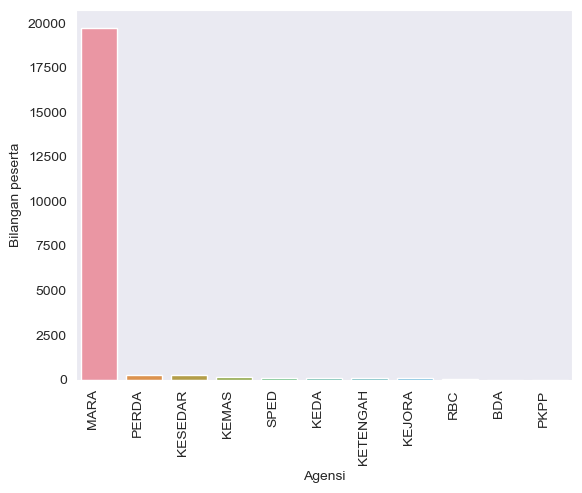

In [34]:
# bar plot of frequency
ax = sns.barplot(x = "Agensi", y = "Freq", data = dff)

# configure plot labels
ax.set(xlabel="Agensi", ylabel="Bilangan peserta")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, horizontalalignment='right')

<Axes: ylabel='Agensi'>

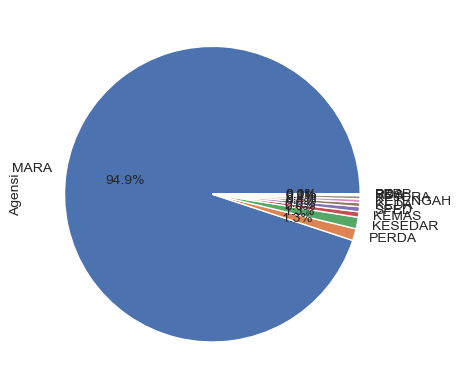

In [36]:
#seaborn library
colors = sns.color_palette("deep")[0:10]

df["Agensi"].value_counts().plot(kind="pie", colors=colors, autopct="%.1f%%")

### Participants by category

In [37]:
dff = df["Kategori Usahawan"].value_counts()

# convert series to dataframe
dff = dff.reset_index()
dff.columns = ["Kategori Usahawan", 'Freq']

[Text(0, 0, 'START-UP (ST) - < RM24,000'),
 Text(1, 0, 'PIQO (P) - > RM24k <=RM60k'),
 Text(2, 0, 'MIKRO (M) - > RM150k <= RM300k'),
 Text(3, 0, 'NANO (N) - > RM60k<= RM150k'),
 Text(4, 0, 'KECIL (K) - > RM300k <=RM15j'),
 Text(5, 0, 'SEDERHANA (S) - > RM15j <= RM50j')]

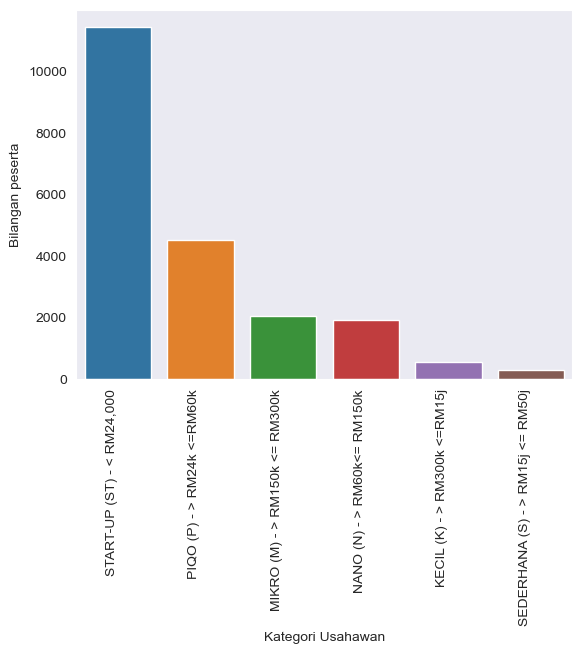

In [38]:
# bar plot of frequency
ax = sns.barplot(x = "Kategori Usahawan", y = "Freq", data = dff)

# configure plot labels
ax.set(xlabel="Kategori Usahawan", ylabel="Bilangan peserta")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, horizontalalignment='right')

<Axes: ylabel='Kategori Usahawan'>

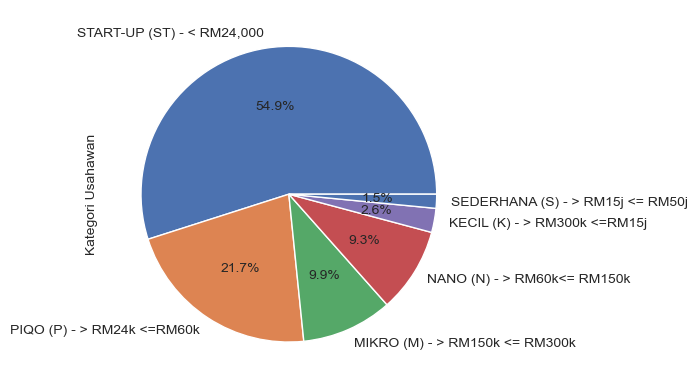

In [39]:
#seaborn library
colors = sns.color_palette("deep")[0:5]

df["Kategori Usahawan"].value_counts().plot(kind="pie", colors=colors, autopct="%.1f%%")

### Participant age

In [43]:
# Processing age by IC number
ic = df["No K/P"].str.strip('[]')
df["Umur"] = ic.astype(str).str[:2]
df = df[pd.to_numeric(df["Umur"], errors='coerce').notnull()]
df.head()

,Bil,Nama Usahawan,No K/P,Agensi,Jantina,No Telefon Bimbit,Kategori Usahawan,Syarikat,Umur
0,1,SITI ROHANI BT A BAKAR,[820210115206],KETENGAH,Perempuan,[0148073647],"START-UP (ST) - < RM24,000","TEST,TEST2",82
1,2,HAJJAH RAZIANA HANIFA,[640716075784],PERDA,Perempuan,[0125109160],PIQO (P) - > RM24k <=RM60k,JASZ TRADING,64
2,3,PAIRUS BINTI ISMAIL,[760814085704],PERDA,Lelaki,[0175323952],PIQO (P) - > RM24k <=RM60k,FAIRUS SAUJANA ENTRERPRISE,76
3,4,MUHAMAD AKASYAH BIN KHAIRUDIN,[990105027089],PERDA,Lelaki,[01128400810],PIQO (P) - > RM24k <=RM60k,MUHAMAD AKASYAH BIN KHAIRUDIN,99
4,5,MOHAMMAD YUSOFF BIN SHAIK ISMAIL,[79123075131],PERDA,Lelaki,[0189424849],MIKRO (M) - > RM150k <= RM300k,MYSIS TRADING,79


In [44]:
age = df["Umur"].astype(int)
df["Umur"] = abs(2023-age).astype(str).str[-2:].astype(int)

<Axes: xlabel='Umur', ylabel='Count'>

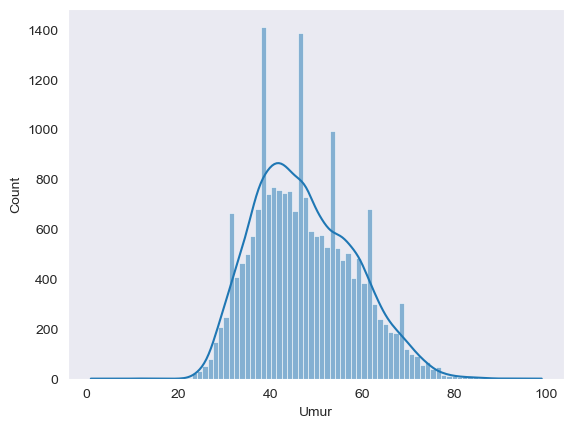

In [42]:
# Age histogram
sns.histplot(data=df["Umur"], kde=True)

<Axes: xlabel='Umur', ylabel='Count'>

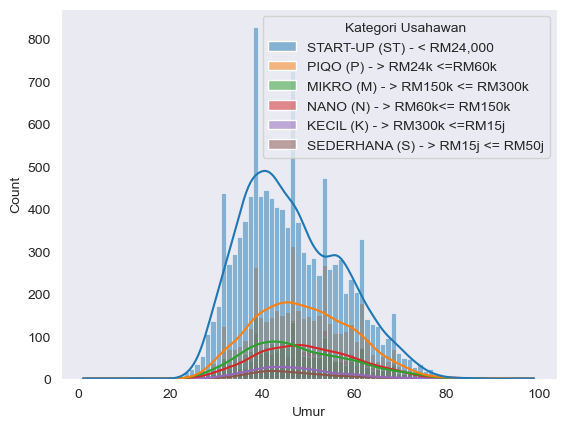

In [47]:
# Age histogram by "Kategory Usahawan"
sns.histplot(data=df, kde=True, x = "Umur", hue = "Kategori Usahawan", multiple="stack")

## KUD Pelangai 2023

In [3]:
# load dataset
df_pel = pd.read_excel("data/Pelangai KUD 2023.xlsx")
# df_pel = pd.read_csv("data/Pelangai KUD 2023.csv")
df_pel.head()

,Time,Nama (First),Nama (Last),Jantina,Umur,Adakah anda mempunyai cadangan/ penambahbaikan?,Negeri,Daerah,Bentuk Penyertaan di KUD,Adakah anda Penerima Manfaat?,...,Pengetahuan berkenaan program latihan keusahawan dibawah ekosistem @ KKDW,Modal untuk memulakan perniagaan,Minat untuk memulakan perniagaan,Usaha dalam memulakan perniagaan,Galakan dalam berkecimpung dalam bidang perniagaan,Pandangan berkenaan keupayaan usahawan dalam persaingan perniagaan,Pandangan berkenaan perundangan dan regulasi dalam mendapatkan bantuan perniagaan,Mempunyai individu yang dijadikan sumber inspirasi,Enumerator,Unique ID
0,2023-09-30 09:05:16,Iqlima,Ibrahim,Perempuan,48.0,Persuade lebih kempe Dan maklumat tenting kkw....,0 = Pahang|,Raub,Pengunjung,Tidak,...,Tiada maklumat berkaitan dengan latihan yang d...,Tidak mempunyai modal,SANGAT BERMINAT untuk berniaga,BERMINAT untuk mencari peluang perniagaan term...,Ada galakan diri sendiri / keluarga untuk berk...,Sukar,Sukar,Mungkin Ada,PEL07,1147459261
1,2023-09-30 09:16:47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1147461146
2,2023-09-30 10:48:25,Ayub,Atan,Lelaki,75.0,NaN,0 = Johor|,Segamat,Pengunjung,Tidak,...,Tiada maklumat berkaitan dengan latihan yang d...,Mempunyai modal mencukupi,BERMINAT untuk berniaga,BERMINAT untuk mencari peluang perniagaan term...,Ada galakan diri sendiri / keluarga untuk berk...,Mudah,Terlalu sukar,Mungkin Ada,PEL09,1147473574
3,2023-09-30 10:48:38,Muhammad daniel,Haikal,Lelaki,21.0,Tiada kot,0 = Selangor|,Subang,Pengunjung,Tidak,...,Tiada maklumat berkaitan dengan latihan yang d...,Tidak mempunyai modal,BERMINAT untuk berniaga,BERMINAT untuk mencari peluang perniagaan term...,Ada galakan diri sendiri / keluarga untuk berk...,Tidak sukar,Tidak sukar,Mungkin Ada,PEL09,1147473601
4,2023-09-30 10:52:49,Fauzi,Mangga,Lelaki,27.0,NaN,0 = Selangor|,Hulu langat,Pengunjung,Tidak,...,Tiada maklumat berkaitan dengan latihan yang d...,Mempunyai lebihan modal,SANGAT BERMINAT untuk berniaga,BERMINAT untuk mencari peluang perniagaan term...,Tidak mengalakan diri sendiri / keluarga untuk...,Terlalu sukar,Sukar,Tiada,PEL09,1147474130


In [88]:
df_pel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 502 entries, 0 to 501
Data columns (total 27 columns):
 #   Column                                                                              Non-Null Count  Dtype         
---  ------                                                                              --------------  -----         
 0   Time                                                                                502 non-null    datetime64[ns]
 1   Nama (First)                                                                        500 non-null    object        
 2   Nama (Last)                                                                         500 non-null    object        
 3   Jantina                                                                             500 non-null    object        
 4   Umur                                                                                500 non-null    float64       
 5   Adakah anda mempunyai cadangan/ penambahbaikan?   

In [26]:
# drop rows with no name
# df_pel = df_pel.dropna(subset=["Nama (First)"])

### Jantina

'54.0%'

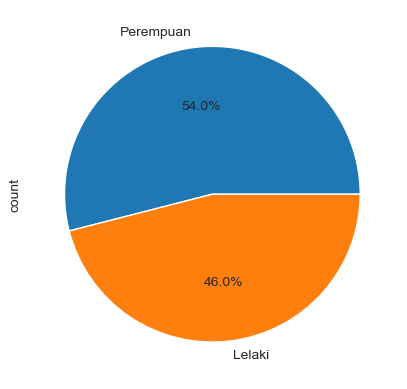

In [4]:
# colors = sns.color_palette("deep")[0:5]

df_pel["Jantina"].value_counts().plot(kind="pie", autopct="%.1f%%")

tmp = df_pel["Jantina"].value_counts(normalize=True).mul(100).round(1).astype(str)+"%"

tmp[0]

### Pecahan umur mengikut bentuk penyertaan

Text(0, 0.5, 'Bilangan')

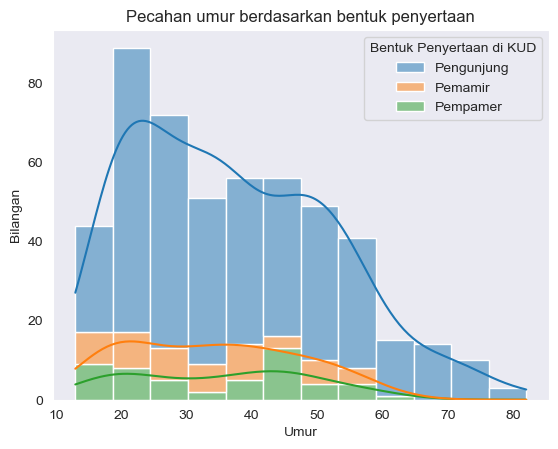

In [5]:
# Age histogram by type of attendance
ax = sns.histplot(data=df_pel, kde=True, x = "Umur", hue="Bentuk Penyertaan di KUD", multiple="stack").set(title="Pecahan umur berdasarkan bentuk penyertaan")
plt.ylabel("Bilangan")

### Pecahan negeri

<Axes: ylabel='count'>

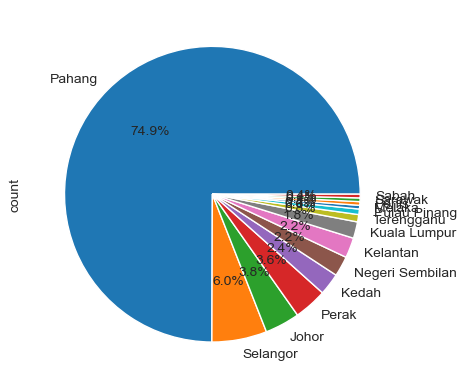

In [6]:
# Remove weird characters
df_pel["Negeri"] = df_pel["Negeri"].str.strip("0  = |")
# Continue to remove weird chars, split and take the first element
df_pel["Negeri"] = df_pel["Negeri"].str.split("|").str[0]

# States pie chart
df_pel["Negeri"].value_counts().plot(kind="pie", autopct="%.1f%%")

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 [Text(0, 0, 'Pahang'),
  Text(1, 0, 'Johor'),
  Text(2, 0, 'Selangor'),
  Text(3, 0, 'Negeri Sembilan'),
  Text(4, 0, 'Kelantan'),
  Text(5, 0, 'Kedah'),
  Text(6, 0, 'Kuala Lumpur'),
  Text(7, 0, 'Pulau Pinang'),
  Text(8, 0, 'Terengganu'),
  Text(9, 0, 'Perak'),
  Text(10, 0, 'Melaka'),
  Text(11, 0, 'Perlis'),
  Text(12, 0, 'Sarawak'),
  Text(13, 0, 'Sabah')])

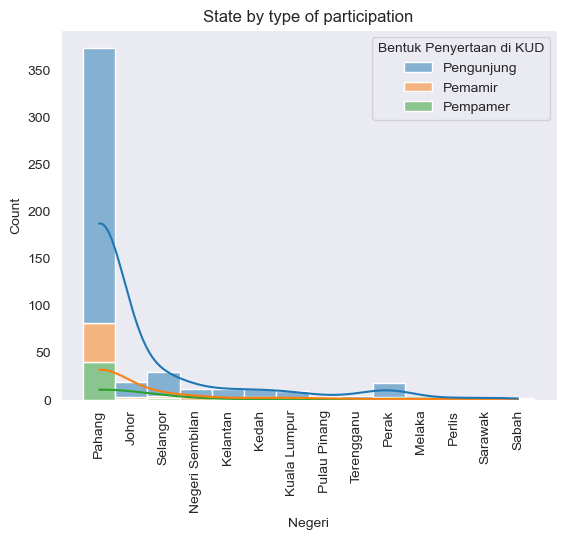

In [7]:
plt.figure()
ax = sns.histplot(data=df_pel, kde=True, x = "Negeri", hue="Bentuk Penyertaan di KUD", multiple="stack").set(title="State by type of participation")
plt.xticks(rotation=90)

### Pecahan penerima manfaat mengikut negeri

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 [Text(0, 0, 'Pahang'),
  Text(1, 0, 'Johor'),
  Text(2, 0, 'Selangor'),
  Text(3, 0, 'Negeri Sembilan'),
  Text(4, 0, 'Kelantan'),
  Text(5, 0, 'Kedah'),
  Text(6, 0, 'Kuala Lumpur'),
  Text(7, 0, 'Pulau Pinang'),
  Text(8, 0, 'Terengganu'),
  Text(9, 0, 'Perak'),
  Text(10, 0, 'Melaka'),
  Text(11, 0, 'Perlis'),
  Text(12, 0, 'Sarawak'),
  Text(13, 0, 'Sabah')])

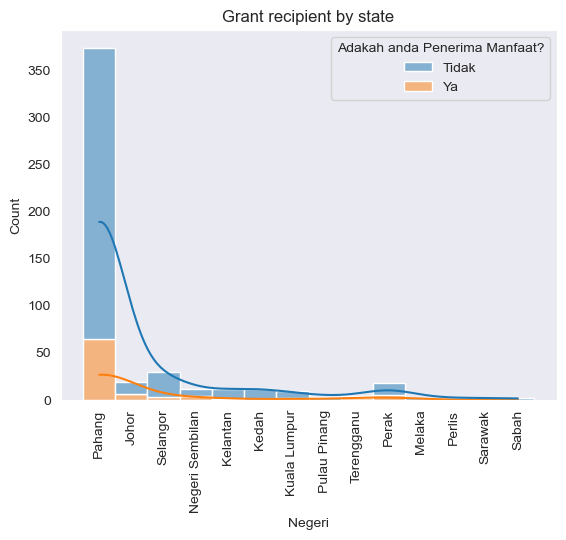

In [8]:
plt.figure()
ax = sns.histplot(data=df_pel, kde=True, x = "Negeri", hue="Adakah anda Penerima Manfaat?", multiple="stack").set(title="Grant recipient by state")
plt.xticks(rotation=90)

## Bidang Perniagaan

<Axes: ylabel='count'>

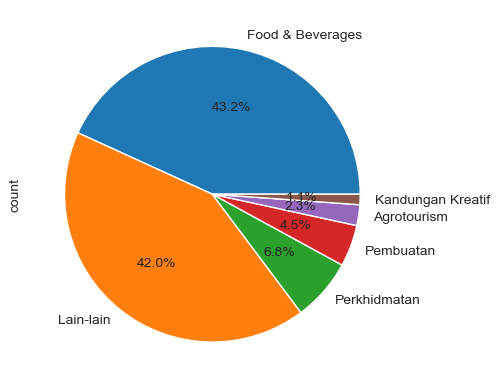

In [9]:
# Remove weird characters
df_pel["Bidang Perniagaan"] = df_pel["Bidang Perniagaan"].str.strip("0  = |")
# Continue to remove weird chars, split and take the first element
df_pel["Bidang Perniagaan"] = df_pel["Bidang Perniagaan"].str.split("|").str[0]

df_pel["Bidang Perniagaan"].value_counts().plot(kind="pie", autopct="%.1f%%")

In [10]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Create a SimpleImputer object for categorical data
cat_imputer = SimpleImputer(strategy='constant', fill_value='missing')

# Create a ColumnTransformer object to apply the imputers and OneHotEncoder
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', cat_imputer, ["Bidang Perniagaan"]),
        ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False), ["Bidang Perniagaan"])
    ])

# Fit and transform the data
preprocessed_data = preprocessor.fit_transform(df_pel)

In [11]:
preprocessed_data.shape

(502, 8)

### Penerima manfaat berdasarkan bidang perniagaan

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Lain-lain'),
  Text(1, 0, 'Food & Beverages'),
  Text(2, 0, 'Perkhidmatan'),
  Text(3, 0, 'Pembuatan'),
  Text(4, 0, 'Agrotourism'),
  Text(5, 0, 'Kandungan Kreatif')])

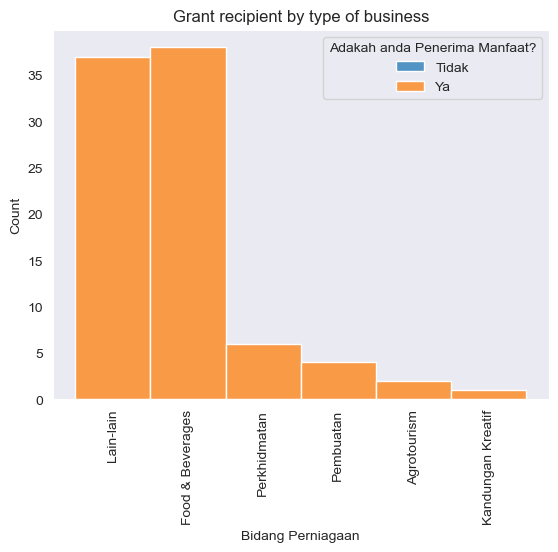

In [12]:
plt.figure()
ax = sns.histplot(data=df_pel, kde=False, x = "Bidang Perniagaan", hue="Adakah anda Penerima Manfaat?", multiple="stack").set(title="Grant recipient by type of business")
plt.xticks(rotation=90)

Text(0, 0.5, 'Bilangan')

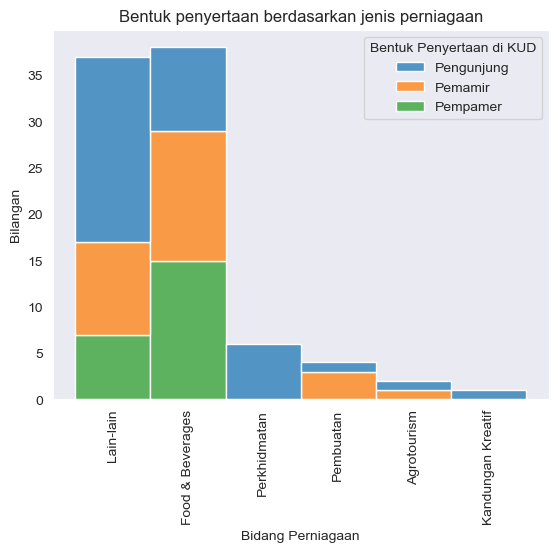

In [13]:
plt.figure()
ax = sns.histplot(data=df_pel, kde=False, x = "Bidang Perniagaan", hue="Bentuk Penyertaan di KUD", multiple="stack").set(title="Bentuk penyertaan berdasarkan jenis perniagaan")
plt.xticks(rotation=90)
plt.ylabel("Bilangan")

Text(0, 0.5, 'Bilangan')

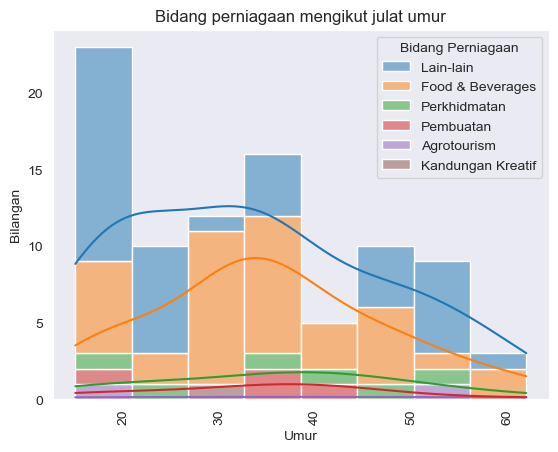

In [14]:
plt.figure()
ax = sns.histplot(data=df_pel, kde=True, x = "Umur", hue="Bidang Perniagaan", multiple="stack").set(title="Bidang perniagaan mengikut julat umur")
plt.xticks(rotation=90)
plt.ylabel("Bilangan")

In [15]:
df_pel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 502 entries, 0 to 501
Data columns (total 27 columns):
 #   Column                                                                              Non-Null Count  Dtype         
---  ------                                                                              --------------  -----         
 0   Time                                                                                502 non-null    datetime64[ns]
 1   Nama (First)                                                                        500 non-null    object        
 2   Nama (Last)                                                                         500 non-null    object        
 3   Jantina                                                                             500 non-null    object        
 4   Umur                                                                                500 non-null    float64       
 5   Adakah anda mempunyai cadangan/ penambahbaikan?   

## Jenis Bantuan

<Axes: ylabel='count'>

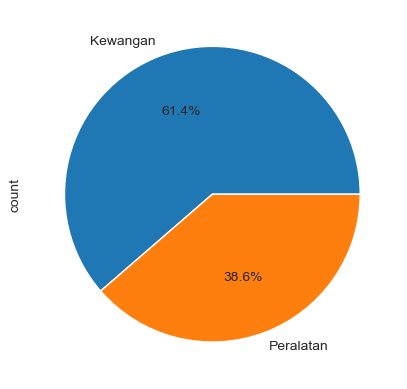

In [16]:
# Remove weird characters
df_pel["Jenis Bantuan"] = df_pel["Jenis Bantuan"].str.strip("0  = |")
# Continue to remove weird chars, split and take the first element
df_pel["Jenis Bantuan"] = df_pel["Jenis Bantuan"].str.split("|").str[0]

df_pel["Jenis Bantuan"].value_counts().plot(kind="pie", autopct="%.1f%%")

Text(0, 0.5, 'Bilangan')

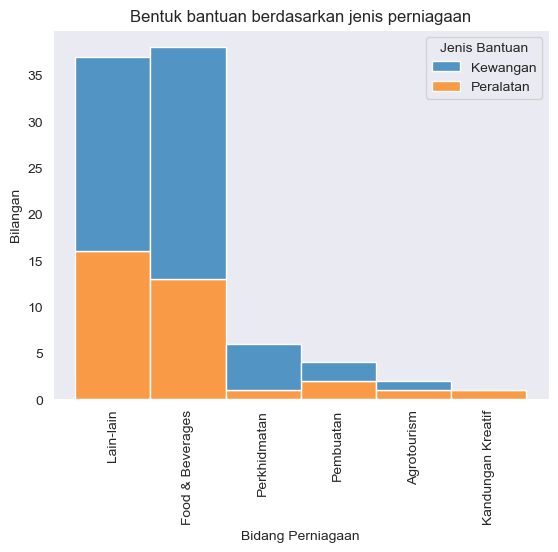

In [17]:
plt.figure()
ax = sns.histplot(data=df_pel, kde=False, x = "Bidang Perniagaan", hue="Jenis Bantuan", multiple="stack").set(title="Bentuk bantuan berdasarkan jenis perniagaan")
plt.xticks(rotation=90)
plt.ylabel("Bilangan")

## Peralatan/Kewangan 

<Axes: ylabel='count'>

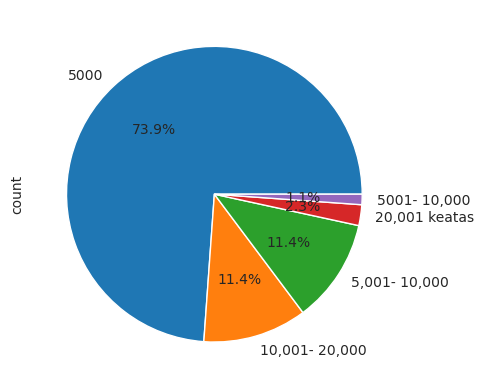

In [35]:
# Remove weird characters
# df_pel["Peralatan/Kewangan yang Diterima"] = df_pel["Peralatan/Kewangan yang Diterima"].str.strip("0  = |")
# Continue to remove weird chars, split and take the first element
# df_pel["Peralatan/Kewangan yang Diterima"] = df_pel["Peralatan/Kewangan yang Diterima"].str.split("|").str[0]

df_pel["Peralatan/Kewangan yang Diterima"].value_counts().plot(kind="pie", autopct="%.1f%%")

Text(0, 0.5, 'Bilangan')

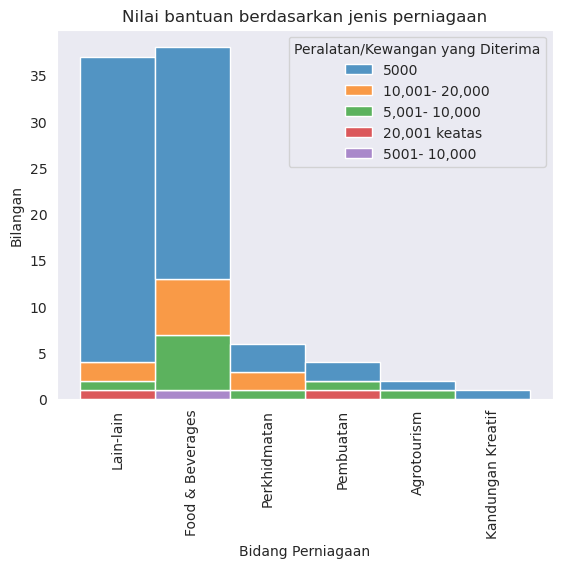

In [36]:
plt.figure()
ax = sns.histplot(data=df_pel, kde=False, x = "Bidang Perniagaan", hue="Peralatan/Kewangan yang Diterima", multiple="stack").set(title="Nilai bantuan berdasarkan jenis perniagaan")
plt.xticks(rotation=90)
plt.ylabel("Bilangan")

## Modal sebelum menerima bantuan

<Axes: ylabel='count'>

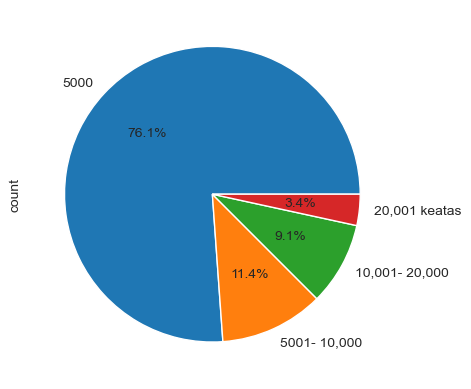

In [18]:
# Remove weird characters
# df_pel["Peralatan/Kewangan yang Diterima"] = df_pel["Peralatan/Kewangan yang Diterima"].str.strip("0  = |")
# Continue to remove weird chars, split and take the first element
# df_pel["Peralatan/Kewangan yang Diterima"] = df_pel["Peralatan/Kewangan yang Diterima"].str.split("|").str[0]

df_pel["Modal Sebelum Mendapat Geran"].value_counts().plot(kind="pie", autopct="%.1f%%")

Text(0, 0.5, 'Bilangan')

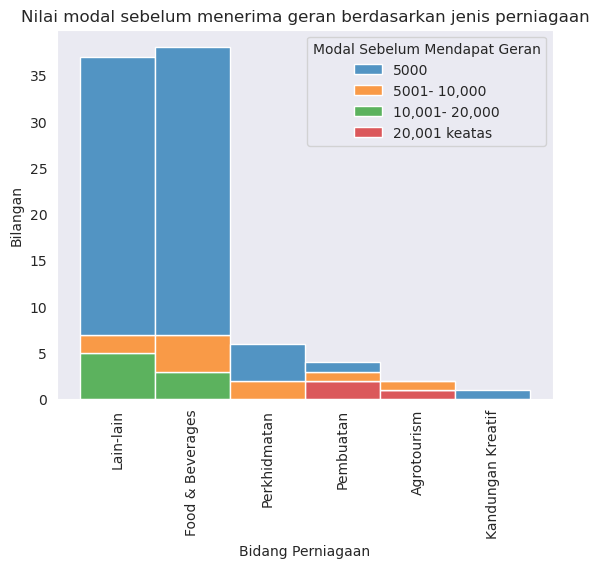

In [38]:
plt.figure()
ax = sns.histplot(data=df_pel, kde=False, x = "Bidang Perniagaan", hue="Modal Sebelum Mendapat Geran", multiple="stack").set(title="Nilai modal sebelum menerima geran berdasarkan jenis perniagaan")
plt.xticks(rotation=90)
plt.ylabel("Bilangan")

### Hubungkait antara modal sebelum dan nilai bantuan

In [19]:
df_pel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 502 entries, 0 to 501
Data columns (total 27 columns):
 #   Column                                                                              Non-Null Count  Dtype         
---  ------                                                                              --------------  -----         
 0   Time                                                                                502 non-null    datetime64[ns]
 1   Nama (First)                                                                        500 non-null    object        
 2   Nama (Last)                                                                         500 non-null    object        
 3   Jantina                                                                             500 non-null    object        
 4   Umur                                                                                500 non-null    float64       
 5   Adakah anda mempunyai cadangan/ penambahbaikan?   

In [20]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np
from scipy.stats import mannwhitneyu

dff = df_pel[df_pel["Adakah anda Penerima Manfaat?"]=="Ya"]

dff["Modal Sebelum Mendapat Geran"] = dff["Modal Sebelum Mendapat Geran"].astype(str)
# dff["Modal Sebelum Mendapat Geran"] = dff["Modal Sebelum Mendapat Geran"].replace("5000", 1)
# dff["Modal Sebelum Mendapat Geran"] = dff["Modal Sebelum Mendapat Geran"].replace("5001- 10,000", 2)
# dff["Modal Sebelum Mendapat Geran"] = dff["Modal Sebelum Mendapat Geran"].replace("10,001- 20,000", 3)
# dff["Modal Sebelum Mendapat Geran"] = dff["Modal Sebelum Mendapat Geran"].replace("20,001 keatas", 4)
dff["Modal Sebelum Mendapat Geran"].unique()


/var/folders/ql/p3kfkc9j0yg9y6hmz6mjxnr00000gn/T/ipykernel_3970/2757078693.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dff["Modal Sebelum Mendapat Geran"] = dff["Modal Sebelum Mendapat Geran"].astype(str)


array(['5000', '5001- 10,000', '10,001- 20,000', '20,001 keatas'],
      dtype=object)

In [21]:
dff["Peralatan/Kewangan yang Diterima"] = dff["Peralatan/Kewangan yang Diterima"].astype(str)
# dff["Peralatan/Kewangan yang Diterima"] = dff["Peralatan/Kewangan yang Diterima"].replace("5000", 1)
# dff["Peralatan/Kewangan yang Diterima"] = dff["Peralatan/Kewangan yang Diterima"].replace("10,001- 20,000", 3)
# dff["Peralatan/Kewangan yang Diterima"] = dff["Peralatan/Kewangan yang Diterima"].replace("5,001- 10,000", 2)
# dff["Peralatan/Kewangan yang Diterima"] = dff["Peralatan/Kewangan yang Diterima"].replace("5001- 10,000", "5,001- 10,000")
# dff["Peralatan/Kewangan yang Diterima"] = dff["Peralatan/Kewangan yang Diterima"].replace("20,001 keatas", 4)


/var/folders/ql/p3kfkc9j0yg9y6hmz6mjxnr00000gn/T/ipykernel_3970/3796548329.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dff["Peralatan/Kewangan yang Diterima"] = dff["Peralatan/Kewangan yang Diterima"].astype(str)


In [22]:
dff["Peralatan/Kewangan yang Diterima"].unique()

array(['5000', '10,001- 20,000', '5,001- 10,000', '20,001 keatas',
       '5001- 10,000'], dtype=object)

In [23]:
dff["Keuntungan Bulanan"] = dff["Keuntungan Bulanan"].astype(str)
# dff["Keuntungan Bulanan"] = dff["Keuntungan Bulanan"].replace("5000", 1)
# dff["Keuntungan Bulanan"] = dff["Keuntungan Bulanan"].replace("10,001- 20,000", 3)
# dff["Keuntungan Bulanan"] = dff["Keuntungan Bulanan"].replace("5,001- 10,000", 2)
# dff["Keuntungan Bulanan"] = dff["Keuntungan Bulanan"].replace("5001- 10,000", 2)
# dff["Keuntungan Bulanan"] = dff["Keuntungan Bulanan"].replace("20,001 keatas", 4)
dff["Keuntungan Bulanan"].unique()

/var/folders/ql/p3kfkc9j0yg9y6hmz6mjxnr00000gn/T/ipykernel_3970/3169848676.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dff["Keuntungan Bulanan"] = dff["Keuntungan Bulanan"].astype(str)


array(['5001- 10,000', '5000', '10,001- 20,000', '20,001 keatas'],
      dtype=object)

In [24]:
dff[["Modal Sebelum Mendapat Geran", "Peralatan/Kewangan yang Diterima"]]

,Modal Sebelum Mendapat Geran,Peralatan/Kewangan yang Diterima
5,5000,5000
12,5000,5000
15,5000,5000
16,5000,5000
17,5000,5000
...,...,...
474,5000,5000
475,5000,5000
479,"5001- 10,000",5000
483,5000,"10,001- 20,000"


In [25]:
from scipy.stats import ttest_ind
U1, p = ttest_ind(dff["Modal Sebelum Mendapat Geran"], dff["Keuntungan Bulanan"], alternative="less")

TypeError: unsupported operand type(s) for /: 'str' and 'int'

In [100]:
U1

-0.19089209144413544

In [101]:
p

0.42441634315665305

In [21]:
x

NameError: name 'x' is not defined

In [26]:
crosstab_res=pd.crosstab(index=dff["Peralatan/Kewangan yang Diterima"],columns=dff["Modal Sebelum Mendapat Geran"])
crosstab_res

Modal Sebelum Mendapat Geran,"10,001- 20,000","20,001 keatas",5000,"5001- 10,000"
Peralatan/Kewangan yang Diterima,,,,
"10,001- 20,000",3,0,6,1
"20,001 keatas",0,1,1,0
"5,001- 10,000",0,0,4,6
5000,5,2,55,3
"5001- 10,000",0,0,1,0


Chi-square test finds the probability of a Null hypothesis(H0).

* Assumption(H0): The two columns *"Modal Sebelum Mendapat Geran"* and *"Peralatan/Kewangan yang Diterima"* are NOT related to each other
* Result of Chi-Sq Test: The Probability of H0 being True


H0 will be accepted if P-value > 0.05. Which means the variables are not correlated with each other. If two variables are correlated, then the P-value will come very close to zero.

In [27]:
from scipy.stats import chi2_contingency, chi2

stat, p, dof, expected = chi2_contingency(crosstab_res)

# interpret p-value
alpha = 0.05
print("p value is %.10f" % p)
if p <= alpha:
    print('Dependent (reject H0) - variables are correlated')
else:
    print('Independent (H0 holds true) - variables are not correlated')

p value is 0.0000061443
Dependent (reject H0) - variables are correlated


In [28]:
print('dof=%d' % dof)
print(expected)
# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
 print('Dependent (reject H0)')
else:
 print('Independent (fail to reject H0)')
# interpret p-value
alpha = 1.0 - prob
print('significance=%.10f, p=%.10f' % (alpha, p))
if p <= alpha:
 print('Dependent (reject H0)')
else:
 print('Independent (fail to reject H0)')

dof=12
[[9.09090909e-01 3.40909091e-01 7.61363636e+00 1.13636364e+00]
 [1.81818182e-01 6.81818182e-02 1.52272727e+00 2.27272727e-01]
 [9.09090909e-01 3.40909091e-01 7.61363636e+00 1.13636364e+00]
 [5.90909091e+00 2.21590909e+00 4.94886364e+01 7.38636364e+00]
 [9.09090909e-02 3.40909091e-02 7.61363636e-01 1.13636364e-01]]
probability=0.950, critical=21.026, stat=46.306
Dependent (reject H0)
significance=0.0500000000, p=0.0000061443
Dependent (reject H0)


In [29]:
# interpret p-value
alpha = 1.0 - prob
print(alpha)
if p <= alpha:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')

0.050000000000000044
Dependent (reject H0)


## Keuntungan bulanan

<Axes: ylabel='count'>

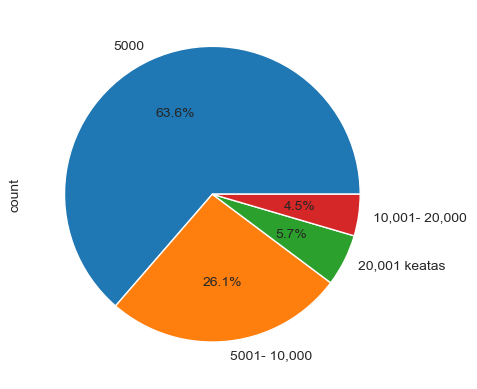

In [30]:
df_pel["Keuntungan Bulanan"].value_counts().plot(kind="pie", autopct="%.1f%%")

Text(0, 0.5, 'Bilangan')

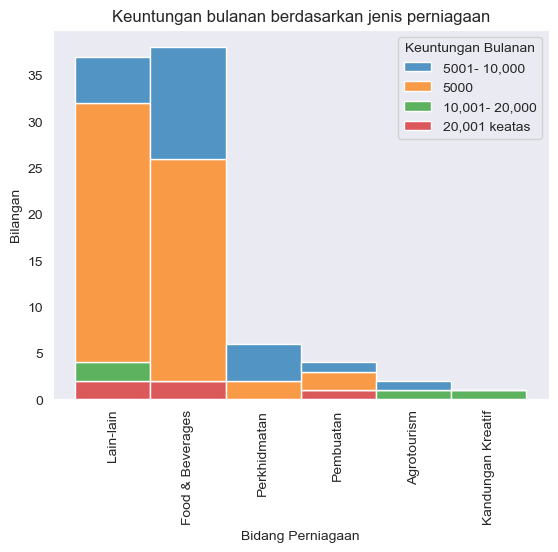

In [31]:
plt.figure()
ax = sns.histplot(data=df_pel, kde=False, x = "Bidang Perniagaan", hue="Keuntungan Bulanan", multiple="stack").set(title="Keuntungan bulanan berdasarkan jenis perniagaan")
plt.xticks(rotation=90)
plt.ylabel("Bilangan")

## Pengetahuan program keusahawan dibawah ekosistem @ KKDW 

<Axes: ylabel='count'>

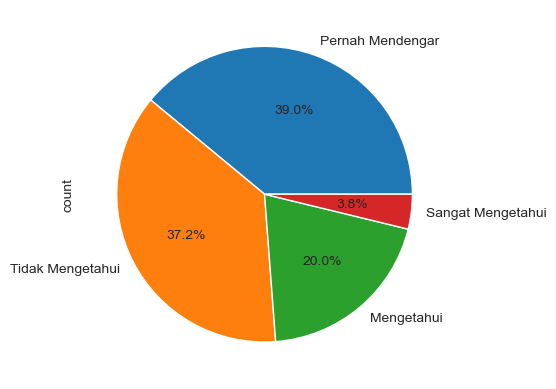

In [32]:
# Remove weird characters
# df_pel["Peralatan/Kewangan yang Diterima"] = df_pel["Peralatan/Kewangan yang Diterima"].str.strip("0  = |")
# Continue to remove weird chars, split and take the first element
# df_pel["Peralatan/Kewangan yang Diterima"] = df_pel["Peralatan/Kewangan yang Diterima"].str.split("|").str[0]

df_pel["Pengetahuan program keusahawan dibawah ekosistem @ KKDW"].value_counts().plot(kind="pie", autopct="%.1f%%")

### Pengetahuan berdasarkan jenis perniagaan

Text(0, 0.5, 'Bilangan')

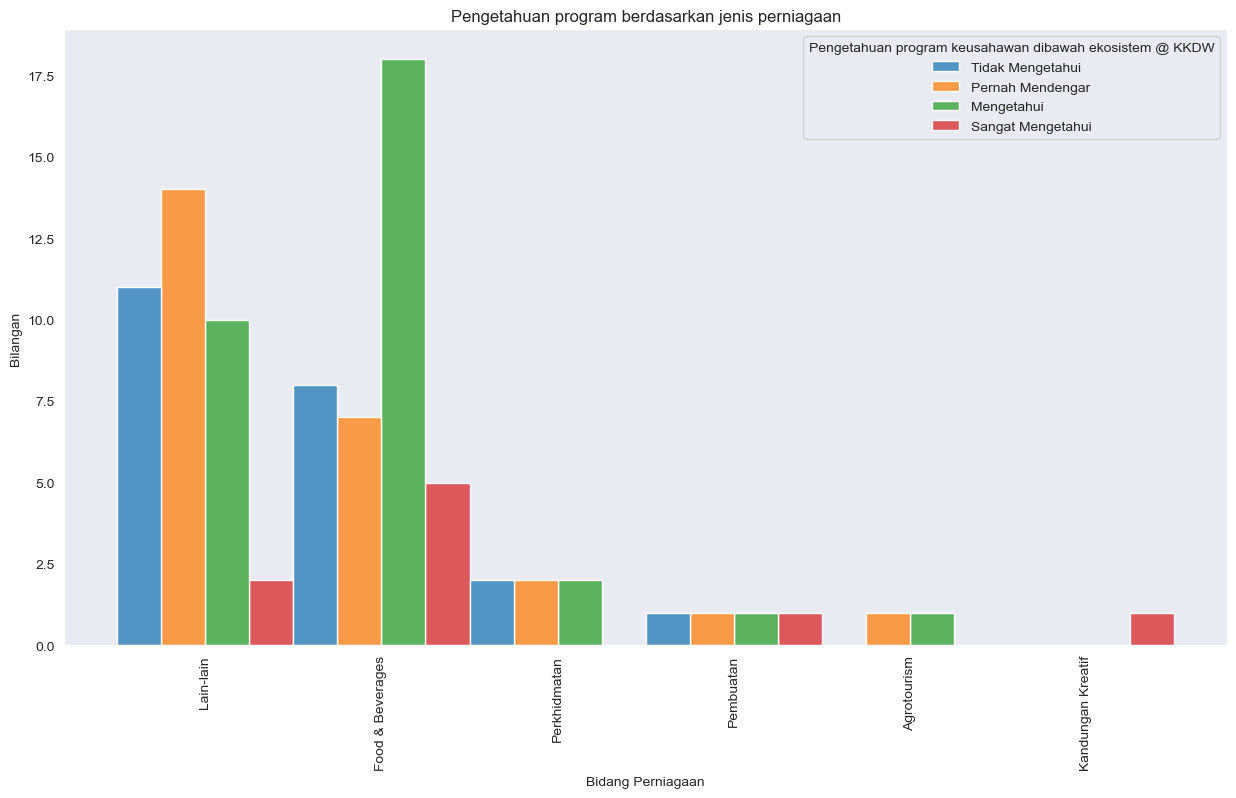

In [33]:
plt.figure(figsize=(15,8))
ax = sns.histplot(data=df_pel, kde=False, x = "Bidang Perniagaan", hue="Pengetahuan program keusahawan dibawah ekosistem @ KKDW", multiple="dodge").set(title="Pengetahuan program berdasarkan jenis perniagaan")
plt.xticks(rotation=90)
plt.ylabel("Bilangan")

Text(0, 0.5, 'Bilangan')

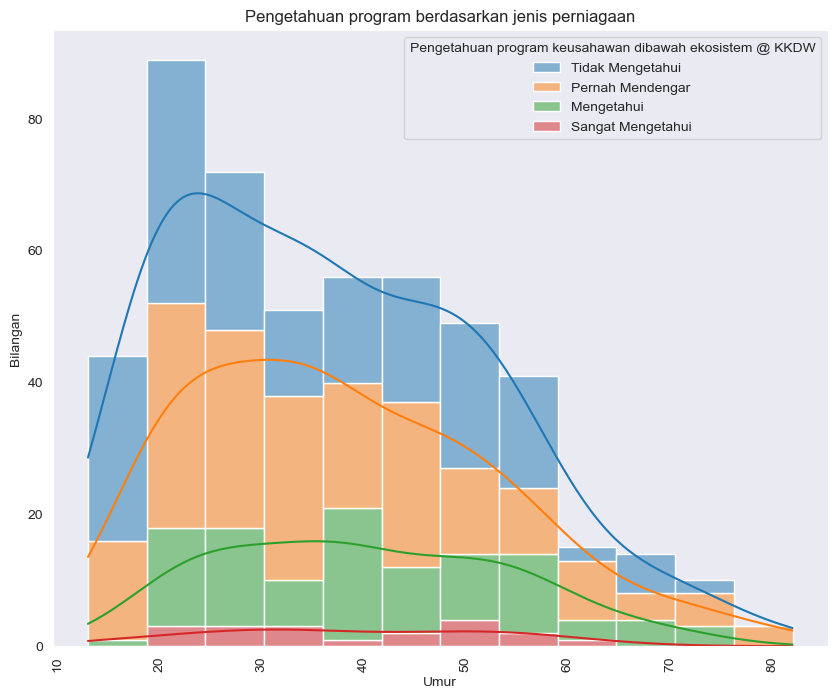

In [34]:
plt.figure(figsize=(10,8))
ax = sns.histplot(data=df_pel, kde=True, x = "Umur", hue="Pengetahuan program keusahawan dibawah ekosistem @ KKDW", multiple="stack").set(title="Pengetahuan program berdasarkan jenis perniagaan")
plt.xticks(rotation=90)
plt.ylabel("Bilangan")

Text(0, 0.5, 'Bilangan')

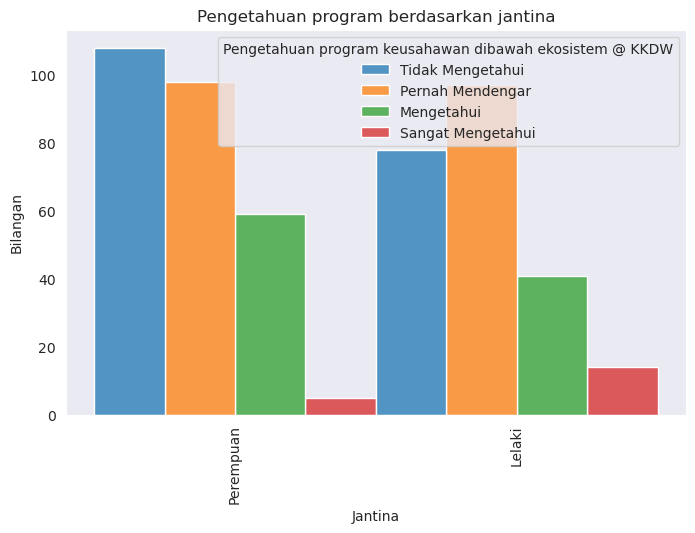

In [47]:
plt.figure(figsize=(8,5))
ax = sns.histplot(data=df_pel, kde=False, x = "Jantina", hue="Pengetahuan program keusahawan dibawah ekosistem @ KKDW", multiple="dodge").set(title="Pengetahuan program berdasarkan jantina")
plt.xticks(rotation=90)
plt.ylabel("Bilangan")

## Pengetahuan berkenaan program latihan keusahawan dibawah ekosistem @ KKDW

<Axes: ylabel='count'>

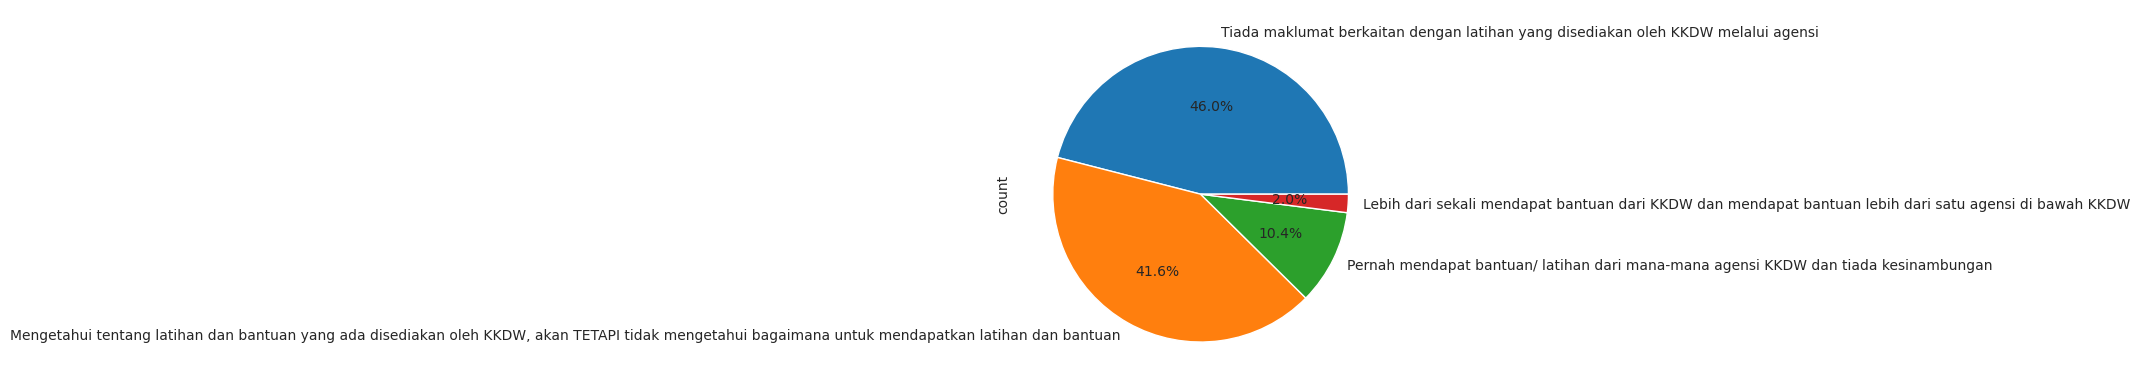

In [48]:
df_pel["Pengetahuan berkenaan program latihan keusahawan dibawah ekosistem @ KKDW"].value_counts().plot(kind="pie", autopct="%.1f%%")

### Berdasarkan bidang perniagaan

Text(0, 0.5, 'Bilangan')

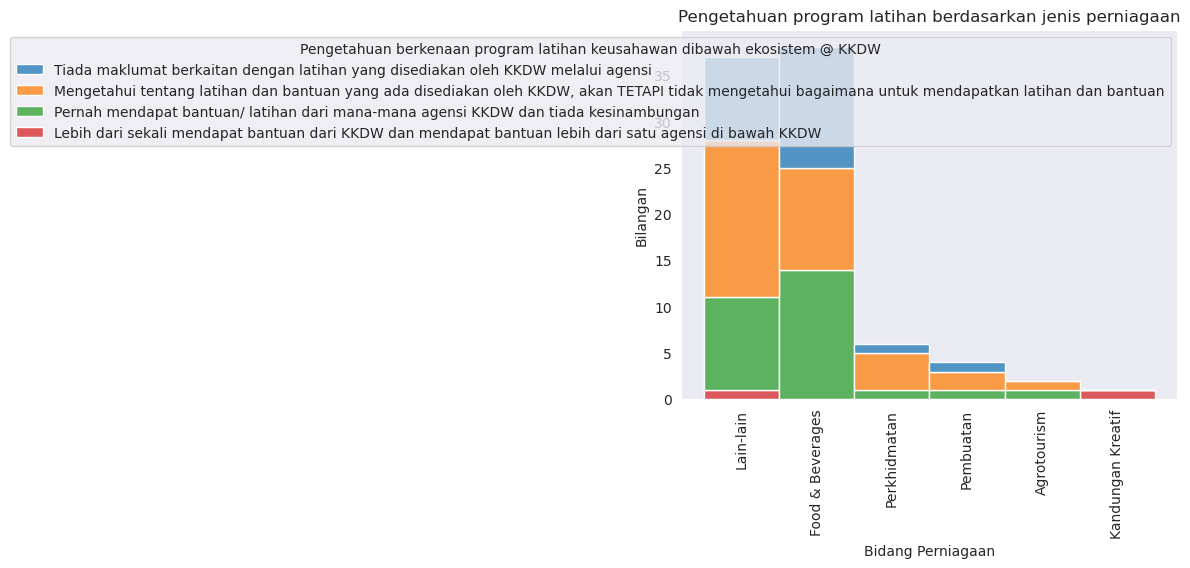

In [50]:
plt.figure()
ax = sns.histplot(data=df_pel, kde=False, x = "Bidang Perniagaan", hue="Pengetahuan berkenaan program latihan keusahawan dibawah ekosistem @ KKDW", multiple="stack").set(title="Pengetahuan program latihan berdasarkan jenis perniagaan")
plt.xticks(rotation=90)
plt.ylabel("Bilangan")

Text(0, 0.5, 'Bilangan')

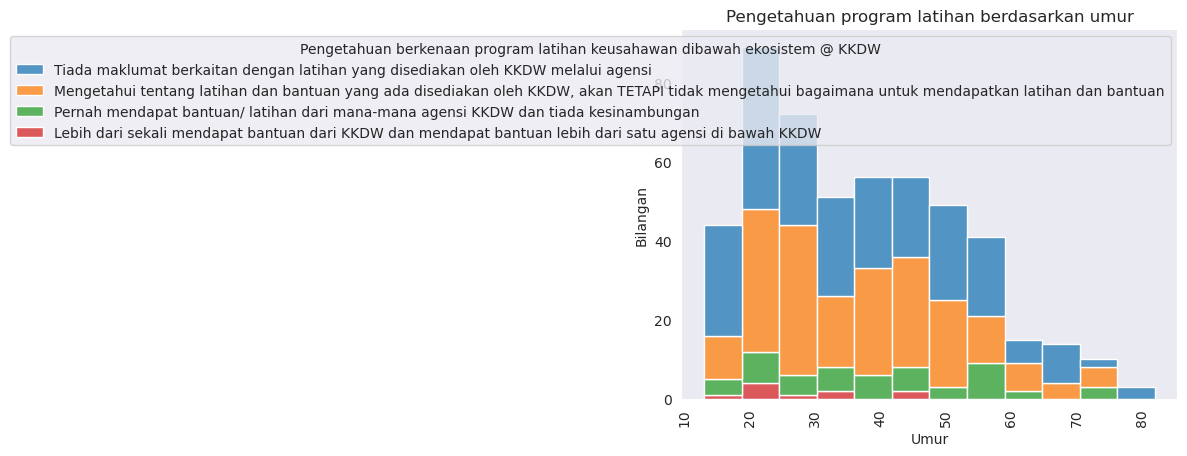

In [51]:
plt.figure()
ax = sns.histplot(data=df_pel, kde=False, x = "Umur", hue="Pengetahuan berkenaan program latihan keusahawan dibawah ekosistem @ KKDW", multiple="stack").set(title="Pengetahuan program latihan berdasarkan umur")
plt.xticks(rotation=90)
plt.ylabel("Bilangan")

### Hubungkait antara pengetahuan tentang program keusahawanan dan pengetahuan berkenaan program latihan keusahawanan

In [52]:
crosstab_res=pd.crosstab(index=df_pel["Pengetahuan program keusahawan dibawah ekosistem @ KKDW"],columns=df_pel["Pengetahuan berkenaan program latihan keusahawan dibawah ekosistem @ KKDW"])
crosstab_res

Pengetahuan berkenaan program latihan keusahawan dibawah ekosistem @ KKDW,Lebih dari sekali mendapat bantuan dari KKDW dan mendapat bantuan lebih dari satu agensi di bawah KKDW,"Mengetahui tentang latihan dan bantuan yang ada disediakan oleh KKDW, akan TETAPI tidak mengetahui bagaimana untuk mendapatkan latihan dan bantuan",Pernah mendapat bantuan/ latihan dari mana-mana agensi KKDW dan tiada kesinambungan,Tiada maklumat berkaitan dengan latihan yang disediakan oleh KKDW melalui agensi
Pengetahuan program keusahawan dibawah ekosistem @ KKDW,,,,
Mengetahui,3,55,29,13
Pernah Mendengar,1,114,18,62
Sangat Mengetahui,5,8,5,1
Tidak Mengetahui,1,31,0,154


In [35]:
stat, p, dof, expected = chi2_contingency(crosstab_res)

# interpret p-value
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H0) - variables are correlated')
else:
    print('Independent (H0 holds true) - variables are not correlated')

p value is 6.144275250393545e-06
Dependent (reject H0) - variables are correlated


In [36]:
df_pel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 502 entries, 0 to 501
Data columns (total 27 columns):
 #   Column                                                                              Non-Null Count  Dtype         
---  ------                                                                              --------------  -----         
 0   Time                                                                                502 non-null    datetime64[ns]
 1   Nama (First)                                                                        500 non-null    object        
 2   Nama (Last)                                                                         500 non-null    object        
 3   Jantina                                                                             500 non-null    object        
 4   Umur                                                                                500 non-null    float64       
 5   Adakah anda mempunyai cadangan/ penambahbaikan?   

## Modal, minat dan usaha untuk memulakan perniagaan

<Axes: ylabel='count'>

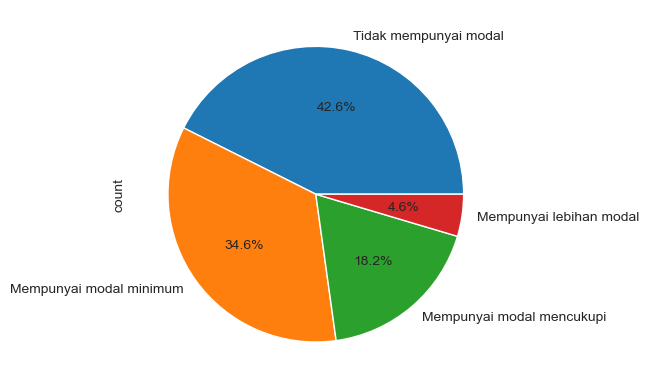

In [37]:
df_pel["Modal untuk memulakan perniagaan "].value_counts().plot(kind="pie", autopct="%.1f%%")

<Axes: ylabel='count'>

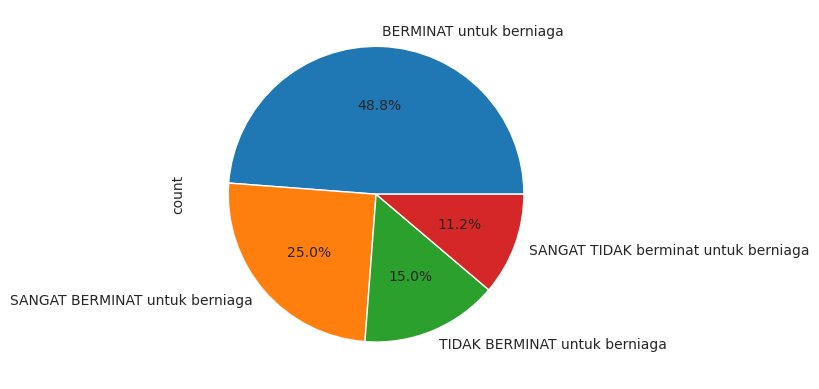

In [56]:
df_pel["Minat untuk memulakan perniagaan "].value_counts().plot(kind="pie", autopct="%.1f%%")

Text(0, 0.5, 'Bilangan')

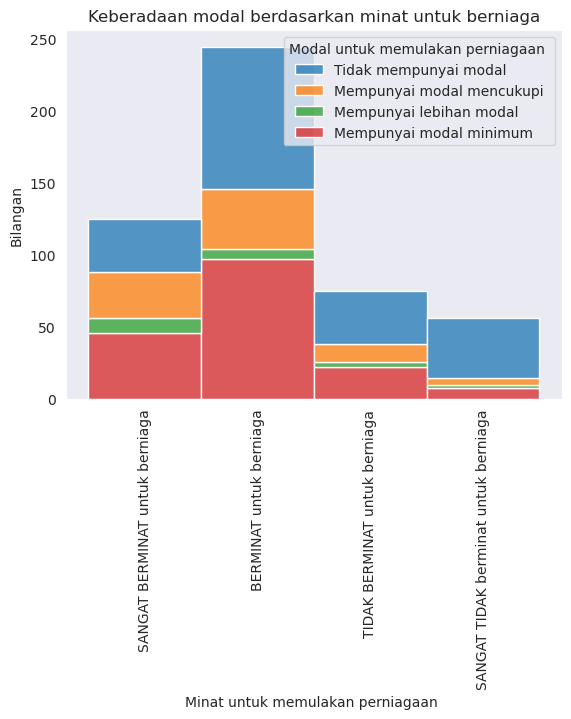

In [57]:
plt.figure()
ax = sns.histplot(data=df_pel, kde=False, x = "Minat untuk memulakan perniagaan ", hue="Modal untuk memulakan perniagaan ", multiple="stack").set(title="Keberadaan modal berdasarkan minat untuk berniaga")
plt.xticks(rotation=90)
plt.ylabel("Bilangan")

### Minat dan pengetahuan

Text(0, 0.5, 'Bilangan')

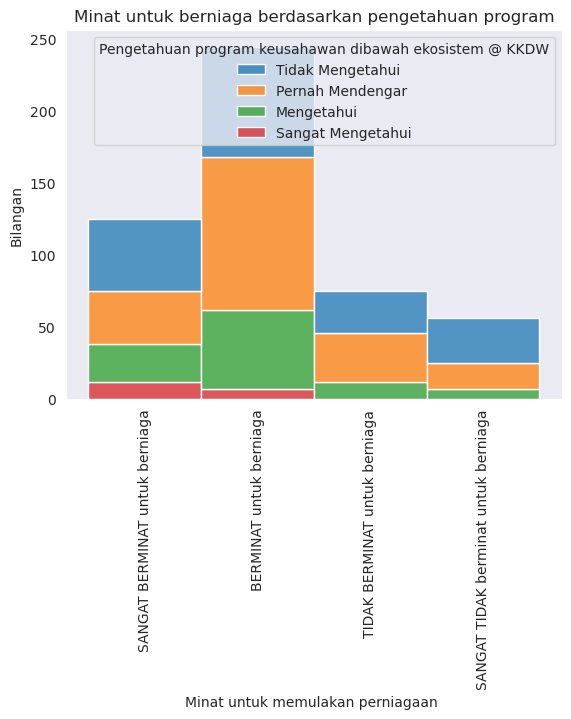

In [58]:
plt.figure()
ax = sns.histplot(data=df_pel, kde=False, x = "Minat untuk memulakan perniagaan ", hue="Pengetahuan program keusahawan dibawah ekosistem @ KKDW", multiple="stack").set(title="Minat untuk berniaga berdasarkan pengetahuan program")
plt.xticks(rotation=90)
plt.ylabel("Bilangan")

In [38]:
crosstab_res=pd.crosstab(index=df_pel["Minat untuk memulakan perniagaan "],columns=df_pel["Pengetahuan berkenaan program latihan keusahawan dibawah ekosistem @ KKDW"])
crosstab_res

Pengetahuan berkenaan program latihan keusahawan dibawah ekosistem @ KKDW,Lebih dari sekali mendapat bantuan dari KKDW dan mendapat bantuan lebih dari satu agensi di bawah KKDW,"Mengetahui tentang latihan dan bantuan yang ada disediakan oleh KKDW, akan TETAPI tidak mengetahui bagaimana untuk mendapatkan latihan dan bantuan",Pernah mendapat bantuan/ latihan dari mana-mana agensi KKDW dan tiada kesinambungan,Tiada maklumat berkaitan dengan latihan yang disediakan oleh KKDW melalui agensi
Minat untuk memulakan perniagaan,,,,
BERMINAT untuk berniaga,0,113,32,99
SANGAT BERMINAT untuk berniaga,9,45,13,58
SANGAT TIDAK berminat untuk berniaga,0,16,3,37
TIDAK BERMINAT untuk berniaga,1,34,4,36


In [39]:
stat, p, dof, expected = chi2_contingency(crosstab_res)

# interpret p-value
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H0) - variables are correlated')
else:
    print('Independent (H0 holds true) - variables are not correlated')

p value is 1.003291257396711e-05
Dependent (reject H0) - variables are correlated


### Usaha

<Axes: ylabel='count'>

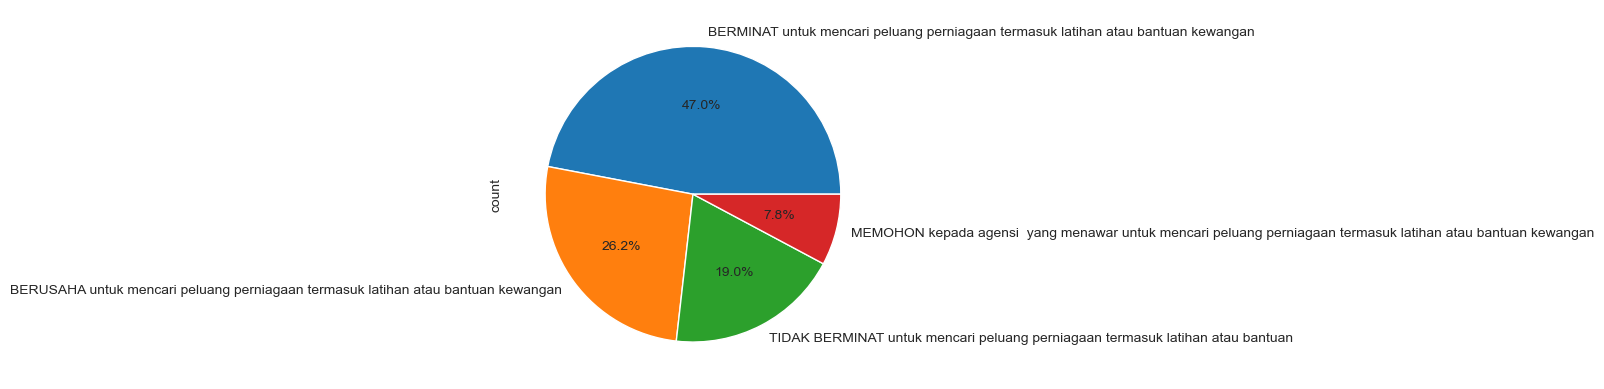

In [40]:
df_pel["Usaha dalam memulakan perniagaan "].value_counts().plot(kind="pie", autopct="%.1f%%")

In [41]:
df_pel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 502 entries, 0 to 501
Data columns (total 27 columns):
 #   Column                                                                              Non-Null Count  Dtype         
---  ------                                                                              --------------  -----         
 0   Time                                                                                502 non-null    datetime64[ns]
 1   Nama (First)                                                                        500 non-null    object        
 2   Nama (Last)                                                                         500 non-null    object        
 3   Jantina                                                                             500 non-null    object        
 4   Umur                                                                                500 non-null    float64       
 5   Adakah anda mempunyai cadangan/ penambahbaikan?   

<Axes: ylabel='count'>

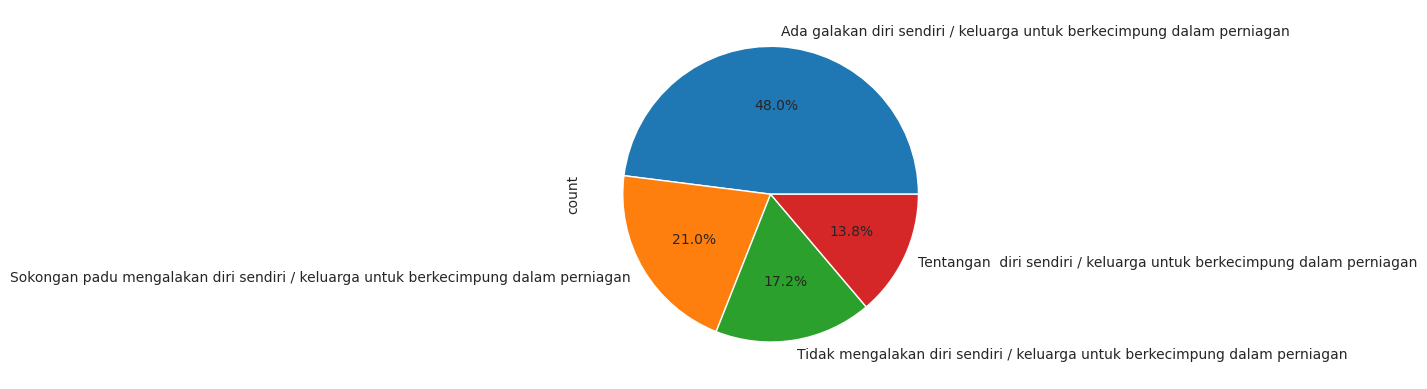

In [62]:
df_pel["Galakan dalam berkecimpung dalam bidang perniagaan "].value_counts().plot(kind="pie", autopct="%.1f%%")

<Axes: ylabel='count'>

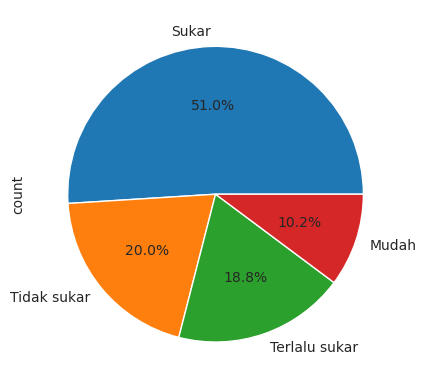

In [63]:
df_pel["Pandangan berkenaan keupayaan usahawan dalam persaingan perniagaan "].value_counts().plot(kind="pie", autopct="%.1f%%")

<Axes: ylabel='count'>

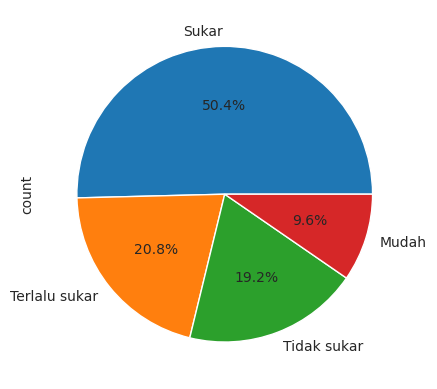

In [64]:
df_pel["Pandangan berkenaan perundangan dan regulasi dalam mendapatkan bantuan perniagaan "].value_counts().plot(kind="pie", autopct="%.1f%%")

## Ikon perniagaan

<Axes: ylabel='count'>

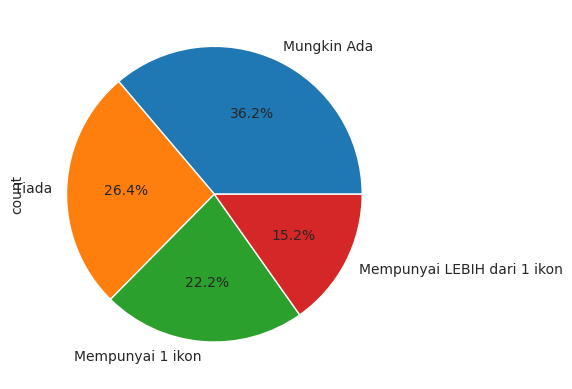

In [65]:
df_pel["Mempunyai individu yang dijadikan sumber inspirasi "].value_counts().plot(kind="pie", autopct="%.1f%%")

Text(0, 0.5, 'Bilangan')

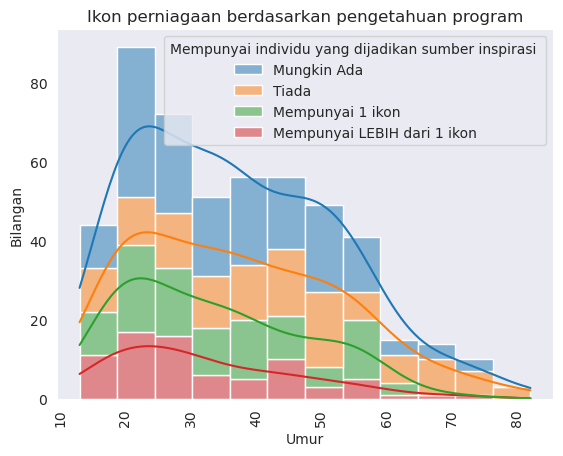

In [66]:
plt.figure()
ax = sns.histplot(data=df_pel, kde=True, x = "Umur", hue="Mempunyai individu yang dijadikan sumber inspirasi ", multiple="stack").set(title="Ikon perniagaan berdasarkan pengetahuan program")
plt.xticks(rotation=90)
plt.ylabel("Bilangan")

## Sentiment analysis

Using `malaya` NLP toolkit.

In [42]:
import malaya

2023-11-09 16:16:46.582937: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
Cannot import beam_search_ops from Tensorflow Addons, ['malaya.jawi_rumi.deep_model', 'malaya.phoneme.deep_model', 'malaya.rumi_jawi.deep_model', 'malaya.stem.deep_model'] will not available to use, make sure Tensorflow Addons version >= 0.12.0
check compatible Tensorflow version with Tensorflow Addons at https://github.com/tensorflow/addons/releases
/Users/faiz/miniconda3/envs/werk/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [46]:
# drop rows with no comments
dff_pel = df_pel.dropna(subset=["Adakah anda mempunyai cadangan/ penambahbaikan?"])

In [43]:
dff_pel = df_pel.replace(np.nan, '', regex=True)

In [44]:
dff_pel

,Time,Nama (First),Nama (Last),Jantina,Umur,Adakah anda mempunyai cadangan/ penambahbaikan?,Negeri,Daerah,Bentuk Penyertaan di KUD,Adakah anda Penerima Manfaat?,...,Pengetahuan berkenaan program latihan keusahawan dibawah ekosistem @ KKDW,Modal untuk memulakan perniagaan,Minat untuk memulakan perniagaan,Usaha dalam memulakan perniagaan,Galakan dalam berkecimpung dalam bidang perniagaan,Pandangan berkenaan keupayaan usahawan dalam persaingan perniagaan,Pandangan berkenaan perundangan dan regulasi dalam mendapatkan bantuan perniagaan,Mempunyai individu yang dijadikan sumber inspirasi,Enumerator,Unique ID
0,2023-09-30 09:05:16,Iqlima,Ibrahim,Perempuan,48.0,Persuade lebih kempe Dan maklumat tenting kkw....,Pahang,Raub,Pengunjung,Tidak,...,Tiada maklumat berkaitan dengan latihan yang d...,Tidak mempunyai modal,SANGAT BERMINAT untuk berniaga,BERMINAT untuk mencari peluang perniagaan term...,Ada galakan diri sendiri / keluarga untuk berk...,Sukar,Sukar,Mungkin Ada,PEL07,1147459261
1,2023-09-30 09:16:47,,,,,,,,,,...,,,,,,,,,,1147461146
2,2023-09-30 10:48:25,Ayub,Atan,Lelaki,75.0,,Johor,Segamat,Pengunjung,Tidak,...,Tiada maklumat berkaitan dengan latihan yang d...,Mempunyai modal mencukupi,BERMINAT untuk berniaga,BERMINAT untuk mencari peluang perniagaan term...,Ada galakan diri sendiri / keluarga untuk berk...,Mudah,Terlalu sukar,Mungkin Ada,PEL09,1147473574
3,2023-09-30 10:48:38,Muhammad daniel,Haikal,Lelaki,21.0,Tiada kot,Selangor,Subang,Pengunjung,Tidak,...,Tiada maklumat berkaitan dengan latihan yang d...,Tidak mempunyai modal,BERMINAT untuk berniaga,BERMINAT untuk mencari peluang perniagaan term...,Ada galakan diri sendiri / keluarga untuk berk...,Tidak sukar,Tidak sukar,Mungkin Ada,PEL09,1147473601
4,2023-09-30 10:52:49,Fauzi,Mangga,Lelaki,27.0,,Selangor,Hulu langat,Pengunjung,Tidak,...,Tiada maklumat berkaitan dengan latihan yang d...,Mempunyai lebihan modal,SANGAT BERMINAT untuk berniaga,BERMINAT untuk mencari peluang perniagaan term...,Tidak mengalakan diri sendiri / keluarga untuk...,Terlalu sukar,Sukar,Tiada,PEL09,1147474130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
497,2023-10-01 14:15:28,Fauziah,Yusuf,Perempuan,52.0,,Perak,Kerian,Pengunjung,Tidak,...,Mengetahui tentang latihan dan bantuan yang ad...,Tidak mempunyai modal,TIDAK BERMINAT untuk berniaga,TIDAK BERMINAT untuk mencari peluang perniagaa...,Tidak mengalakan diri sendiri / keluarga untuk...,Terlalu sukar,Terlalu sukar,Mungkin Ada,PEL02,1147683353
498,2023-10-01 14:15:28,Hashim,Mat,Lelaki,70.0,,Pahang,Rompen,Pengunjung,Tidak,...,Tiada maklumat berkaitan dengan latihan yang d...,Tidak mempunyai modal,BERMINAT untuk berniaga,BERMINAT untuk mencari peluang perniagaan term...,Ada galakan diri sendiri / keluarga untuk berk...,Terlalu sukar,Terlalu sukar,Mungkin Ada,PEL02,1147683354
499,2023-10-01 14:15:28,Putera,Suhairi,Lelaki,30.0,Tiada hebahan,Pahang,Kuantan,Pengunjung,Tidak,...,Mengetahui tentang latihan dan bantuan yang ad...,Tidak mempunyai modal,BERMINAT untuk berniaga,BERMINAT untuk mencari peluang perniagaan term...,Ada galakan diri sendiri / keluarga untuk berk...,Terlalu sukar,Terlalu sukar,Mungkin Ada,PEL02,1147683355
500,2023-10-01 14:15:28,Raja,Afira,Perempuan,22.0,,Selangor,Shah alam,Pengunjung,Tidak,...,Tiada maklumat berkaitan dengan latihan yang d...,Tidak mempunyai modal,SANGAT BERMINAT untuk berniaga,BERMINAT untuk mencari peluang perniagaan term...,Ada galakan diri sendiri / keluarga untuk berk...,Terlalu sukar,Terlalu sukar,Mempunyai 1 ikon,PEL02,1147683356


In [45]:
malaya.sentiment.available_transformer()

,Size (MB),Quantized Size (MB),macro precision,macro recall,macro f1-score
bert,425.6,111.00,0.93182,0.93442,0.93307
tiny-bert,57.4,15.40,0.93390,0.93141,0.93262
albert,48.6,12.80,0.91228,0.91929,0.91540
tiny-albert,22.4,5.98,0.91442,0.91646,0.91521
xlnet,446.6,118.00,0.92390,0.92629,0.92444
alxlnet,46.8,13.30,0.91896,0.92589,0.92198


In [46]:
model = malaya.sentiment.transformer(model="tiny-bert")

In [47]:
pred = model.predict_proba(["Kena buat kerja kuat lagi lahhh"])

2023-11-09 16:18:09.316472: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:353] MLIR V1 optimization pass is not enabled


In [48]:
x = [p["negative"] for p in pred]
x[0]


0.9981645

In [49]:
preds = model.predict(dff_pel["Adakah anda mempunyai cadangan/ penambahbaikan?"].tolist())

In [50]:
dff_pel["Sentiment"] = preds

In [51]:
dff_pel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 502 entries, 0 to 501
Data columns (total 28 columns):
 #   Column                                                                              Non-Null Count  Dtype         
---  ------                                                                              --------------  -----         
 0   Time                                                                                502 non-null    datetime64[ns]
 1   Nama (First)                                                                        502 non-null    object        
 2   Nama (Last)                                                                         502 non-null    object        
 3   Jantina                                                                             502 non-null    object        
 4   Umur                                                                                502 non-null    object        
 5   Adakah anda mempunyai cadangan/ penambahbaikan?   

In [52]:
# dff_pel["Bentuk Penyertaan di KUD"].unique()
# dff_pel["Bentuk Penyertaan di KUD"] = dff_pel["Bentuk Penyertaan di KUD"].replace("Pemamir", "Pempamer")

# dff_pel["Bentuk Penyertaan di KUD"].unique()
dff_pel.to_csv("data/clean-with-sentiment.csv")

### Neutral

In [89]:
tmp = dff_pel[dff_pel["Sentiment"]=="neutral"]
tmp = tmp["Adakah anda mempunyai cadangan/ penambahbaikan?"].sample(3)
print("Komen neutral: ", tmp.values)


wc = WordCloud().generate(''.join(tmp))

Komen neutral:  ['Tiada' 'Tiana' 'Poster']


### Positif

In [45]:
tmp = dff_pel[dff_pel["Sentiment"]=="positive"]
tmp = tmp["Adakah anda mempunyai cadangan/ penambahbaikan?"].sample(3)
print("Komen positif: ", tmp.tolist())

Komen positif:  ['Bagi pengetahuan Asas kepada pemuda terutamanya dari tahap seorang pekerja dahulu sehingga usahawan yg berjaya', 'Mempermudahkan urusan peminjaman', 'Lebihkan fokus untuk golongan muda']


### Negative

In [47]:
tmp = dff_pel[dff_pel["Sentiment"]=="negative"]
tmp = tmp["Adakah anda mempunyai cadangan/ penambahbaikan?"].sample(3)
print("Komen negatif: ", tmp.tolist())

Komen negatif:  ['Tiada system hebahan', 'Senangkn kemudahan pinjaman- nilaikan balik cros/cris punya requirement', 'Selalu buat iklan  supaya org lain tidak ketinggalan']


Text(0, 0.5, 'Bilangan')

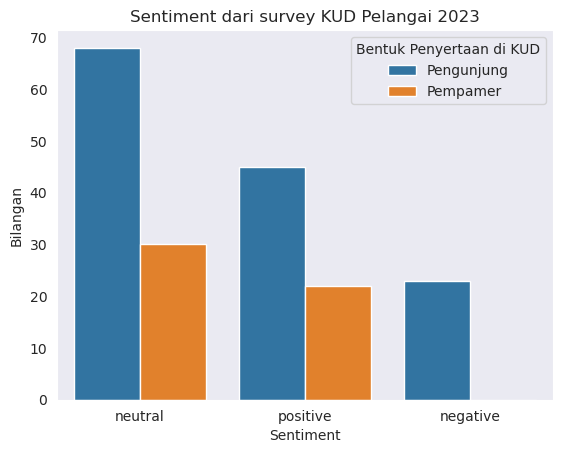

In [92]:
ax = sns.countplot(x="Sentiment", hue="Bentuk Penyertaan di KUD", data=dff_pel).set(title="Sentiment dari survey KUD Pelangai 2023")
plt.ylabel("Bilangan")

Text(0, 0.5, 'Bilangan')

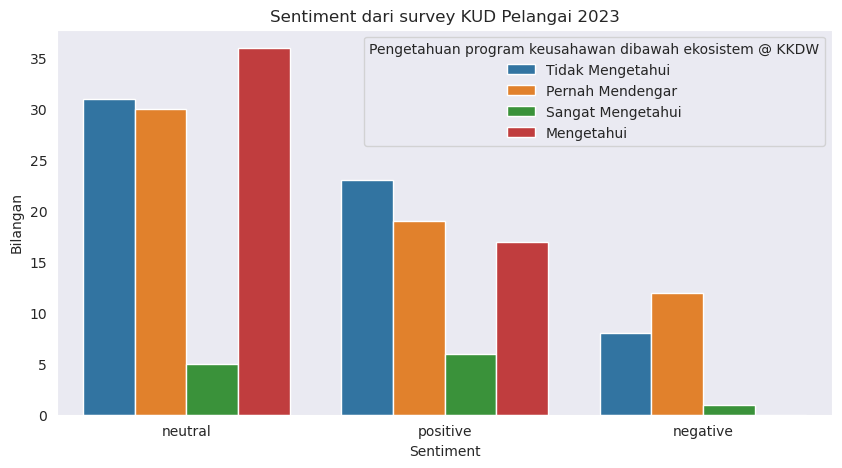

In [19]:
plt.figure(figsize=(10,5))
ax = sns.countplot(x="Sentiment", hue="Pengetahuan program keusahawan dibawah ekosistem @ KKDW", data=dff_pel).set(title="Sentiment dari survey KUD Pelangai 2023")
plt.ylabel("Bilangan")

Text(0, 0.5, 'Bilangan')

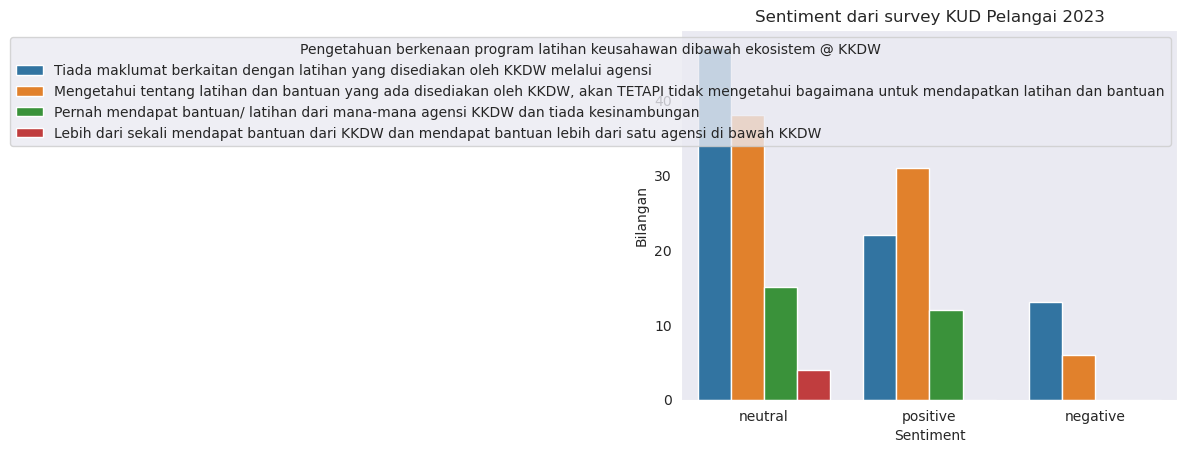

In [108]:
ax = sns.countplot(x="Sentiment", hue="Pengetahuan berkenaan program latihan keusahawan dibawah ekosistem @ KKDW", data=dff_pel).set(title="Sentiment dari survey KUD Pelangai 2023")
plt.ylabel("Bilangan")

### Recent dataset (December 2023)

In [5]:
df1 = pd.read_csv("data/kud-putrajaya-171223.csv")
df2 = pd.read_csv("data/eud-181223.csv")

In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 30 columns):
 #   Column                                                                                                                                                                                                                              Non-Null Count  Dtype 
---  ------                                                                                                                                                                                                                              --------------  ----- 
 0   Timestamp                                                                                                                                                                                                                           309 non-null    object
 1   Nombor Enumerator                                                                                                         

In [7]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 27 columns):
 #   Column                                                                                                                                                                                                                                                                                     Non-Null Count  Dtype  
---  ------                                                                                                                                                                                                                                                                                     --------------  -----  
 0   Timestamp                                                                                                                                                                                                                                                                 